Using https://www.kaggle.com/cyannani123/keras-cellular-image-classification as test example

In [1]:
import os
import sys
from tqdm import tqdm
import pandas as pd
from sklearn.preprocessing import LabelEncoder
sys.path.append('../scripts')
from data_new import ImgGen
import matplotlib.pyplot as plt

Loading test and train data.

Will load directly from zip for now.

In [2]:
train_data = pd.read_csv("../input/recbio/train.csv")
train_data.head()

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,sirna_250
1,HEPG2-01_1_B04,HEPG2-01,1,B04,sirna_62
2,HEPG2-01_1_B05,HEPG2-01,1,B05,sirna_1115
3,HEPG2-01_1_B06,HEPG2-01,1,B06,sirna_602
4,HEPG2-01_1_B07,HEPG2-01,1,B07,sirna_529


In [3]:
sirna_label_encoder = LabelEncoder().fit(train_data.sirna)

Saidid on samast wellist tehtud eri pildid. Pm võib võtta ainult ühe saidi sisse.
Channelid on eri kanalitega tehtud pildid. Neid on kokku 6.

Kirjutan piltide laadimise klassi notebooki näitel

In [4]:
train_data = train_data.sample(frac=0.01).reset_index(drop=True)

In [5]:
len(train_data)


365

In [6]:
train = ImgGen(train_data, label_encoder=sirna_label_encoder, path='../input/recbio')

In [7]:
len(train)

11

In [8]:
%%timeit -n3 -r3
first_batch=train[0]

IndexError: list index out of range

In [ ]:
first_batch=train[0]

In [ ]:
single_array = first_batch[0][0]

In [ ]:
single_array.shape

(6, 512, 512)

In [ ]:

single_array[0:3].shape

(3, 512, 512)

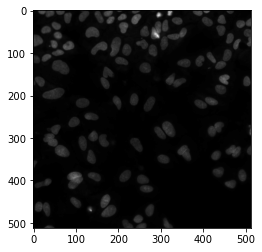

In [ ]:
plt.imshow(single_array[0], cmap=plt.get_cmap('gray'))

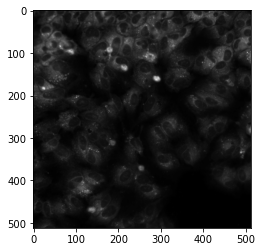

In [ ]:
plt.imshow(single_array[1], cmap=plt.get_cmap('gray'))

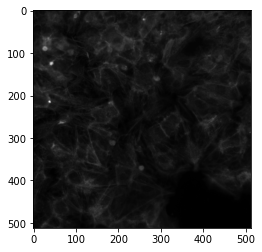

In [ ]:
plt.imshow(single_array[2], cmap=plt.get_cmap('gray'))

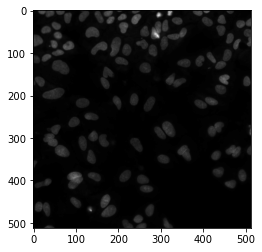

In [ ]:
plt.imshow(single_array[3], cmap=plt.get_cmap('gray'))

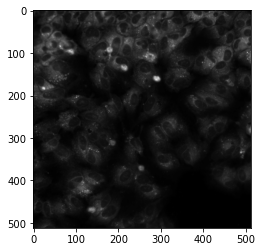

In [ ]:
plt.imshow(single_array[4], cmap=plt.get_cmap('gray'))

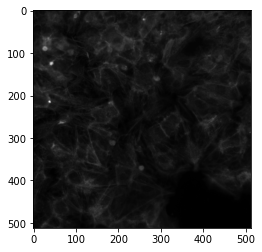

In [ ]:
plt.imshow(single_array[5], cmap=plt.get_cmap('gray'))

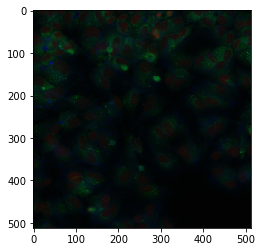

In [ ]:
single_image_2 = single_array[0:3].transpose((1,2,0))
plt.imshow(single_image_2, interpolation='nearest')

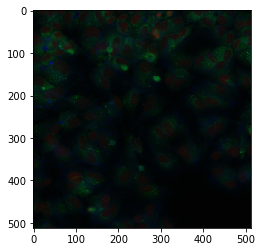

In [ ]:
single_image_2 = single_array[3:6].transpose((1,2,0))
plt.imshow(single_image_2, interpolation='nearest')